In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo

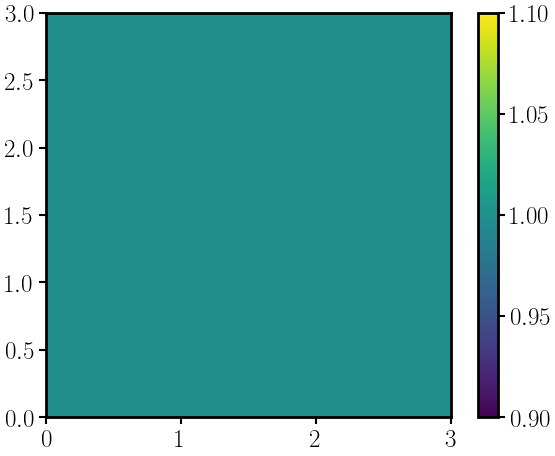

In [2]:
test = np.ones((3, 3))
n, _ = test.shape
plt.imshow(test, extent=[0, n, 0, n])
plt.colorbar()

In [3]:
oversample_factor = 3
oversample_grid = np.zeros((test.shape[0] * oversample_factor, test.shape[1] * oversample_factor))
flattened_model = test.flatten()

if oversample_factor % 2 == 0:
    raise Exception('Oversampling factor must be odd')

k = 0
for i, row in enumerate(oversample_grid):
    for j, _ in enumerate(row):
        if not (i % oversample_factor) - ((oversample_factor - 1) / 2) == 0:
            continue
        if (j % oversample_factor) - ((oversample_factor - 1) / 2) == 0:
            oversample_grid[i][j] = flattened_model[k]
            k += 1

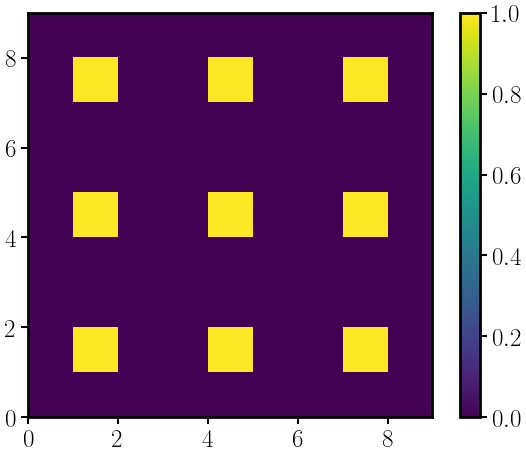

In [4]:
n, _ = oversample_grid.shape
plt.imshow(oversample_grid, extent=[0, n, 0, n])
plt.colorbar()

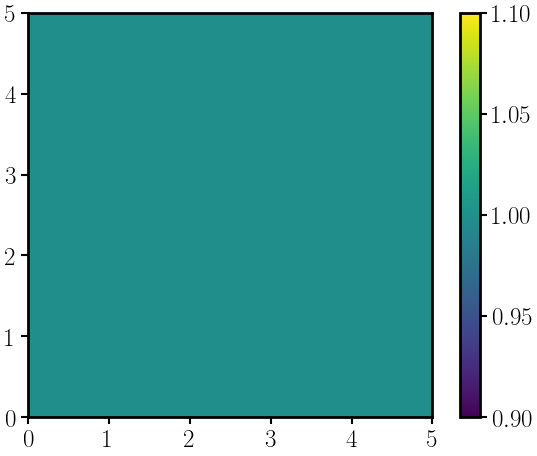

In [7]:
test = np.ones((5, 5))
n, _ = test.shape
plt.imshow(test, extent=[0, n, 0, n])
plt.colorbar()

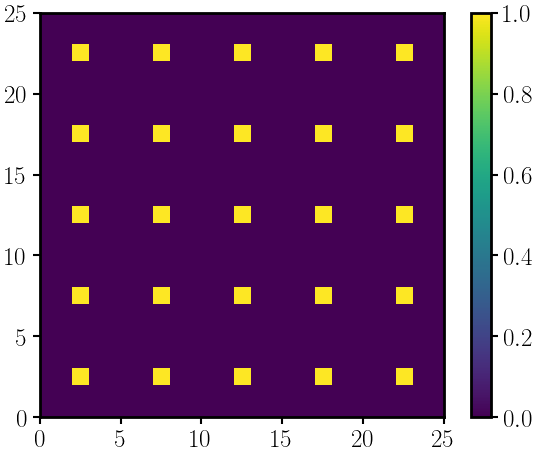

In [9]:
resized = util.resize_with_pixels_centered(test, 5)

n, _ = resized.shape
plt.imshow(resized, extent=[0, n, 0, n])
plt.colorbar()